## GRIP: The Spark Foundation

## Data science and Business Analytics Intern

## Author: Swapna Singarapalli

## Task7- Stock Market Prediction using Numerical and Textual Analysis

### Objective- Create a Hybrid Model for stock Price/Performance Prediction using Numerical Analysis of historical stock Prices and setiment Analysis of New Headlines

In [1]:
pip install pandas-datareader      

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Importing data and necessary libraries

In [2]:
import pandas_datareader as pdr
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pdr.get_data_tiingo('AAPL', api_key='241991618dacded8e4fd14d7d07704c5bff19987')

C:\Users\sappu\AppData\Roaming\Python\Python39\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [4]:
df.to_csv('AAPL.csv')

In [5]:
df.head()

close    high     low    open    volume  \
symbol date                                                                  
AAPL   2018-01-16 00:00:00+00:00  176.19  179.39  176.14  177.90  29159005   
       2018-01-17 00:00:00+00:00  179.10  179.25  175.07  176.15  32752734   
       2018-01-18 00:00:00+00:00  179.26  180.10  178.25  179.37  30234512   
       2018-01-19 00:00:00+00:00  178.46  179.58  177.41  178.61  30827809   
       2018-01-22 00:00:00+00:00  177.00  177.78  176.60  177.30  26023683   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2018-01-16 00:00:00+00:00  41.829942  42.589666  41.818071  42.235919   
       2018-01-17 00:00:00+00:00  42.520816  42.556428  41.564038  41.820445   
       2018-01-18 00:00:00+00:00  42.558802  42.758230  42.319014  42.584918   
       2018-01-19 00:00:00+00:00  42.368871  42.634774  42.119586  42.404483   
       2018-01-22 00:00:00+00:00  42.022247  42.207430  41.927281  42.093471   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2018-01-16 00:00:00+00:00  116636020      0.0          1.0  
       2018-01-17 00:00:00+00:00  131010936      0.0          1.0  
       2018-01-18 00:00:00+00:00  120938048      0.0          1.0  
       2018-01-19 00:00:00+00:00  123311236      0.0          1.0  
       2018-01-22 00:00:00+00:00  104094732      0.0          1.0

In [6]:
df.tail()

close      high     low     open    volume  \
symbol date                                                                     
AAPL   2023-01-05 00:00:00+00:00  125.02  127.7700  124.76  127.130  80962708   
       2023-01-06 00:00:00+00:00  129.62  130.2900  124.89  126.010  87754715   
       2023-01-09 00:00:00+00:00  130.15  133.4100  129.89  130.465  70790813   
       2023-01-10 00:00:00+00:00  130.73  131.2636  128.12  130.260  63896155   
       2023-01-11 00:00:00+00:00  133.49  133.5100  130.46  131.250  69458949   

                                  adjClose   adjHigh  adjLow  adjOpen  \
symbol date                                                             
AAPL   2023-01-05 00:00:00+00:00    125.02  127.7700  124.76  127.130   
       2023-01-06 00:00:00+00:00    129.62  130.2900  124.89  126.010   
       2023-01-09 00:00:00+00:00    130.15  133.4100  129.89  130.465   
       2023-01-10 00:00:00+00:00    130.73  131.2636  128.12  130.260   
       2023-01-11 00:00:00+00:00    133.49  133.5100  130.46  131.250   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2023-01-05 00:00:00+00:00   80962708      0.0          1.0  
       2023-01-06 00:00:00+00:00   87754715      0.0          1.0  
       2023-01-09 00:00:00+00:00   70790813      0.0          1.0  
       2023-01-10 00:00:00+00:00   63896155      0.0          1.0  
       2023-01-11 00:00:00+00:00   69458949      0.0          1.0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1257 entries, ('AAPL', Timestamp('2018-01-16 00:00:00+0000', tz='UTC')) to ('AAPL', Timestamp('2023-01-11 00:00:00+0000', tz='UTC'))
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   close        1257 non-null   float64
 1   high         1257 non-null   float64
 2   low          1257 non-null   float64
 3   open         1257 non-null   float64
 4   volume       1257 non-null   int64  
 5   adjClose     1257 non-null   float64
 6   adjHigh      1257 non-null   float64
 7   adjLow       1257 non-null   float64
 8   adjOpen      1257 non-null   float64
 9   adjVolume    1257 non-null   int64  
 10  divCash      1257 non-null   float64
 11  splitFactor  1257 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 163.9+ KB


In [8]:
df.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1257.000000,1257.000000
mean,190.465887,192.538623,188.169510,190.259268,6.310440e+07,97.267126,98.389958,96.061606,97.205467,1.166881e+08,0.008287,1.002387
std,69.250072,69.868290,68.267543,68.949222,4.074045e+07,46.477611,47.063615,45.855157,46.470143,5.488268e+07,0.072614,0.084616
min,106.840000,110.190000,103.100000,104.540000,1.136204e+07,34.264280,35.114923,34.218495,34.695626,3.519586e+07,0.000000,1.000000
25%,145.490000,146.870000,143.510000,145.030000,2.942101e+07,49.661952,50.131839,49.295094,49.574489,7.989771e+07,0.000000,1.000000
50%,171.830000,173.340000,170.050000,171.555000,5.502087e+07,93.757570,94.384472,92.208752,92.798778,1.024043e+08,0.000000,1.000000
75%,209.680000,212.050000,207.700000,209.880000,8.670915e+07,141.994183,143.447132,140.259198,142.031373,1.367392e+08,0.000000,1.000000
max,506.090000,515.140000,500.330000,514.790000,3.326072e+08,180.731196,181.654662,177.861501,181.346840,4.268849e+08,0.820000,4.000000


In [9]:
df.shape

(1257, 12)

In [10]:
df.isnull().sum()
df1=df.reset_index()['close']

In [11]:
df1.isnull().sum()

0

In [12]:
df1.shape

(1257,)

In [13]:
df1

0       176.19
1       179.10
2       179.26
3       178.46
4       177.00
         ...  
1252    125.02
1253    129.62
1254    130.15
1255    130.73
1256    133.49
Name: close, Length: 1257, dtype: float64

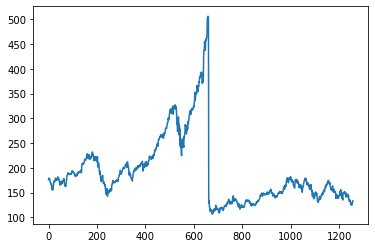

In [14]:
#plot baseline and predictions
import matplotlib.pyplot as plt
plt.plot(df1)

LSTM sensitive to sacle of data

In [15]:
import numpy as np

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [18]:
len(df1)

1257

This is time series data, cross validation and random seed works on categorical data, so we need to devide data into train and
test data 

In [19]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data=df1[0:training_size,:]
test_data=df1[training_size:len(df1),:1]

In [20]:
training_size

817

In [21]:
test_size

440

In [22]:
train_data

array([[1.73700689e-01],
       [1.80989355e-01],
       [1.81390106e-01],
       [1.79386349e-01],
       [1.75729493e-01],
       [1.75829681e-01],
       [1.68766437e-01],
       [1.60976832e-01],
       [1.61978710e-01],
       [1.53087038e-01],
       [1.50607389e-01],
       [1.51759549e-01],
       [1.52636193e-01],
       [1.34402004e-01],
       [1.24358172e-01],
       [1.40738885e-01],
       [1.31997495e-01],
       [1.21001879e-01],
       [1.24157796e-01],
       [1.39937383e-01],
       [1.44020038e-01],
       [1.51609267e-01],
       [1.65685661e-01],
       [1.64283031e-01],
       [1.62830307e-01],
       [1.60876644e-01],
       [1.64458359e-01],
       [1.71972448e-01],
       [1.80663745e-01],
       [1.79211021e-01],
       [1.78534753e-01],
       [1.70720100e-01],
       [1.73750783e-01],
       [1.75278647e-01],
       [1.74902943e-01],
       [1.70795241e-01],
       [1.75579211e-01],
       [1.83193488e-01],
       [1.87551659e-01],
       [1.83168441e-01],


timeseries data=100,150,170,140,159,165,200,185
tiemsteps to be calculated for predicting the future stockprice

f1  f2  o/p
100 150 170 140
159 165 200 185 

In [23]:
import numpy

def dataset_func(dataset, time_step=1):
    datax,datay=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        datax.append(a)
        datay.append(dataset[i+time_step,0])
    return numpy.array(datax),numpy.array(datay)


In [24]:
time_step=100
x_train,y_train=dataset_func(train_data,time_step)
x_test,y_test=dataset_func(test_data,time_step)

In [25]:
print(x_train.shape)

(716, 100)


In [26]:
print(y_train.shape)

(716,)


In [27]:
print(x_test.shape,y_test.shape)


(339, 100) (339,)


In [28]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [29]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.11.0-cp39-cp39-win_amd64.whl (1.9 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [30]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential


created LSTM model for prediction using layers in differnet sizes

In [31]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [32]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=32,verbose=1)


Epoch 1/5
23/23 [==============================] - 22s 340ms/step - loss: 0.0359 - val_loss: 0.0022
Epoch 2/5
23/23 [==============================] - 5s 203ms/step - loss: 0.0115 - val_loss: 6.0546e-04
Epoch 3/5
23/23 [==============================] - 5s 216ms/step - loss: 0.0101 - val_loss: 3.8807e-04
Epoch 4/5
23/23 [==============================] - 5s 219ms/step - loss: 0.0082 - val_loss: 6.9368e-04
Epoch 5/5
23/23 [==============================] - 5s 206ms/step - loss: 0.0069 - val_loss: 3.4186e-04


In [34]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)


11/11 [==============================] - 1s 62ms/step


In [35]:
import math

finding the error in prediction of test data and predicted value

In [36]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))



0.0773621098965566

In [37]:
math.sqrt(mean_squared_error(y_test,test_predict))


0.018489453269886845

In [38]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting


In [39]:
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict



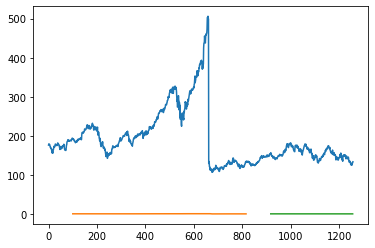

In [40]:
# plot baseline and predictions
import matplotlib.pyplot as plt
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [41]:
len(test_data)

440

In [42]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape


(1, 100)

In [43]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.16200375704445835,
 0.15211020663744512,
 0.15125860989355033,
 0.15201001878522225,
 0.15827175954915462,
 0.142216656230432,
 0.1366061365059486,
 0.13041953663118344,
 0.12618659987476516,
 0.12804007514088916,
 0.1226549780839073,
 0.1194489668127739,
 0.12303068252974325,
 0.1192736380713838,
 0.12656230432060112,
 0.14174076393237317,
 0.1177207263619286,
 0.12140262993112083,
 0.11403882279273636,
 0.10985597996242946,
 0.11932373199749524,
 0.1253850970569818,
 0.1174201628052598,
 0.11496556042579836,
 0.10917971195992482,
 0.11003130870381966,
 0.11251095804633682,
 0.10770194113963677,
 0.08926737633061982,
 0.07854727614276763,
 0.08919223544145266,
 0.09833437695679392,
 0.09908578584846583,
 0.09665623043206006,
 0.08328115216030052,
 0.08410770194113959,
 0.08050093926111451,
 0.07889793362554787,
 0.09054477144646211,
 0.07899812147777074,
 0.08909204758922978,
 0.0924483406386975,
 0.09272385723231058,
 0.09154664996869122,
 0.1012648716343143,
 0.10672510958046327,

In [44]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    



[0.0459277]
101
1 day input [0.15211021 0.15125861 0.15201002 0.15827176 0.14221666 0.13660614
 0.13041954 0.1261866  0.12804008 0.12265498 0.11944897 0.12303068
 0.11927364 0.1265623  0.14174076 0.11772073 0.12140263 0.11403882
 0.10985598 0.11932373 0.1253851  0.11742016 0.11496556 0.10917971
 0.11003131 0.11251096 0.10770194 0.08926738 0.07854728 0.08919224
 0.09833438 0.09908579 0.09665623 0.08328115 0.0841077  0.08050094
 0.07889793 0.09054477 0.07899812 0.08909205 0.09244834 0.09272386
 0.09154665 0.10126487 0.10672511 0.11396368 0.10647464 0.09507827
 0.12247965 0.11646838 0.10973075 0.09565435 0.08025047 0.07899812
 0.08035066 0.08180338 0.07020664 0.10026299 0.10735128 0.10379461
 0.10820288 0.10507201 0.10990607 0.11133375 0.10311835 0.10855354
 0.11078272 0.10336882 0.09362555 0.08598622 0.10316844 0.10386976
 0.10261741 0.09966187 0.0903444  0.08541014 0.08969317 0.08846587
 0.09430182 0.09675642 0.0910958  0.07428929 0.06930495 0.0639449
 0.06376957 0.07165936 0.06359424 0

In [45]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)


In [46]:
len(df1)

1257

plotting graph of predicted output of stock for next 30 days in different color/visualisation

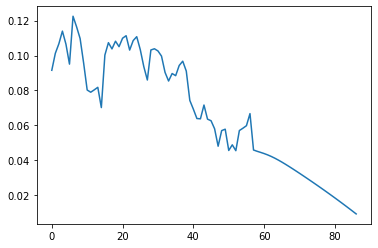

In [47]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

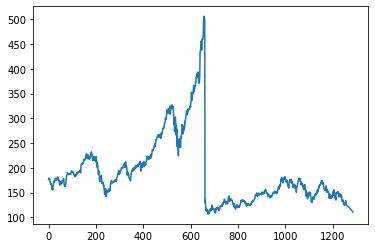

In [48]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)
